C:\Users\Matthew\Dropbox\github_repos\smbh_crtitical_times\figures\figures


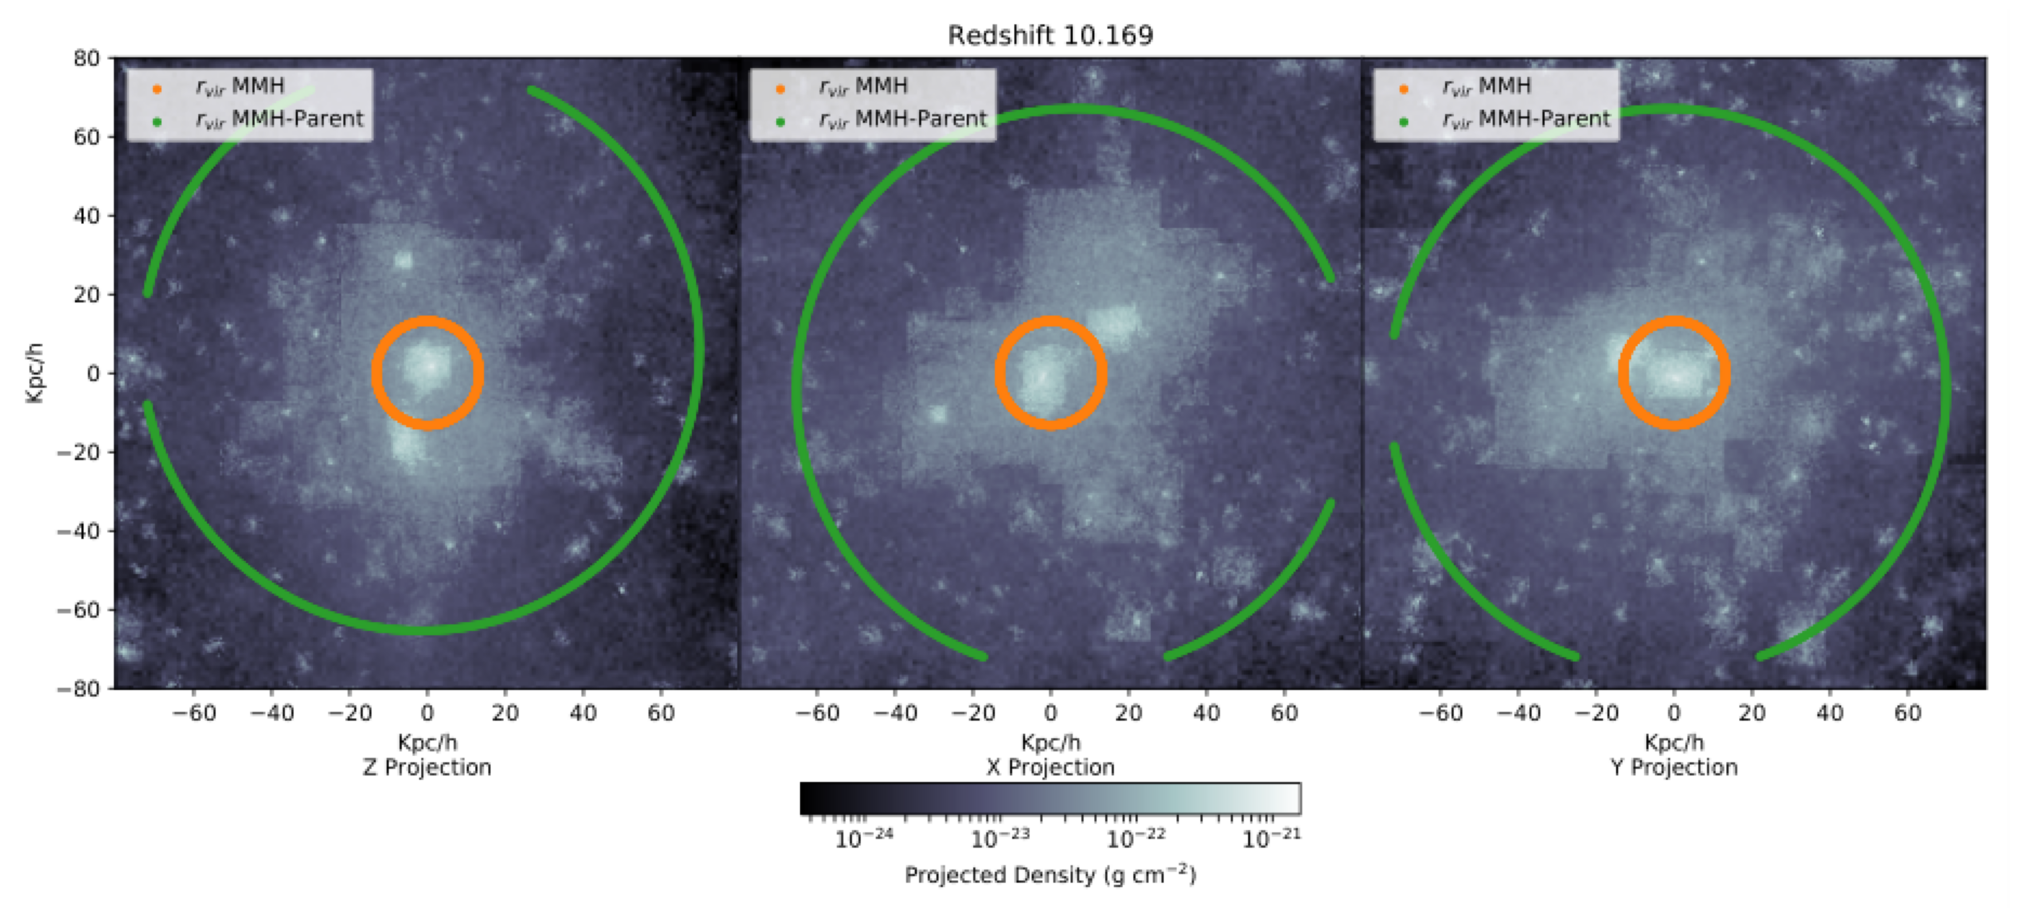

In [34]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import os
import glob
import io
import fitz
from PIL import Image

#plt.rcParams['savefig.bbox'] = 'tight'     # tight garbles the video!!!
plt.rcParams.update(plt.rcParamsDefault)

def generate_video():
    print(os.getcwd())
    
    path = "C:/Users/Matthew/Dropbox/github_repos/smbh_crtitical_times/figures/figures"
    os.chdir(path)
    imgs = glob.glob("*.pdf") # some array of images
    #imgs = imgs[0:3]
    frames = [] # for storing the generated images


    for x in range(len(imgs)):
        pdf_file = fitz.open(imgs[x])
        for page_number in range(len(pdf_file)):
            page = pdf_file[page_number]
            rgb = page.get_pixmap()
            pil_image = Image.open(io.BytesIO(rgb.tobytes())).convert('RGB')
            imgs[x] = pil_image

    fig = plt.figure(frameon=False)
    fig.set_size_inches(20,9)
    #     fig = plt.figure(figsize=(30,16))
    #     plt.axis('off')
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    for i in range(len(imgs)):
        frames.append([plt.imshow(imgs[i], cmap=cm.Greys_r,animated=True, aspect='auto')])

    ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True)
    ani.save('collision.mp4',  dpi=200)
                    
    
generate_video()